This is a slight adaptation of Greg Reda's notebook at: https://github.com/gjreda/gregreda.com/blob/master/content/notebooks/intro-to-pandas.ipynb

----

[A while back I claimed](http://www.gregreda.com/2013/01/23/translating-sql-to-pandas-part1/) I was going to write a couple of posts on translating [pandas](http://pandas.pydata.org) to SQL. I never followed up. However, the other week a couple of coworkers expressed their interest in learning a bit more about it - this seemed like a good reason to revisit the topic.

What follows is a fairly thorough introduction to the library. I chose to break it into three parts as I felt it was too long and daunting as one.

- [Part 1: Intro to pandas data structures](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/), covers the basics of the library's two main data structures - Series and DataFrames.

- [Part 2: Working with DataFrames](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/), dives a bit deeper into the functionality of DataFrames. It shows how to inspect, select, filter, merge, combine, and group your data.

- [Part 3: Using pandas with the MovieLens dataset](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/), applies the learnings of the first two parts in order to answer a few basic analysis questions about the MovieLens ratings data.

If you'd like to follow along, you can find the necessary CSV files [here](https://github.com/gjreda/gregreda.com/tree/master/content/notebooks/data) and the MovieLens dataset [here](http://files.grouplens.org/datasets/movielens/ml-100k.zip).

My goal for this tutorial is to teach the basics of pandas by comparing and contrasting its syntax with SQL. Since all of my coworkers are familiar with SQL, I feel this is the best way to provide a context that can be easily understood by the intended audience.

If you're interested in learning more about the library, pandas author [Wes McKinney](https://twitter.com/wesmckinn) has written [Python for Data Analysis](http://www.amazon.com/gp/product/1449319793/ref=as_li_tl?ie=UTF8&camp=1789&creative=390957&creativeASIN=1449319793&linkCode=as2&tag=gjreda-20&linkId=MCGW4C4NOBRVV5OC), which covers it in much greater detail.

### What is it?
[pandas](http://pandas.pydata.org/) is an open source [Python](http://www.python.org/) library for data analysis. Python has always been great for prepping and munging data, but it's never been great for analysis - you'd usually end up using [R](http://www.r-project.org/) or loading it into a database and using SQL (or worse, Excel). pandas makes Python great for analysis.

## Data Structures
pandas introduces two new data structures to Python - [Series](http://pandas.pydata.org/pandas-docs/dev/dsintro.html#series) and [DataFrame](http://pandas.pydata.org/pandas-docs/dev/dsintro.html#dataframe), both of which are built on top of [NumPy](http://www.numpy.org/) (this means it's fast).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [3]:
# create a Series with an arbitrary list
s = pd.Series(['Apple', 'Banana', 'Peach', 'Mango', 'Orange'])
s

0     Apple
1    Banana
2     Peach
3     Mango
4    Orange
dtype: object

Alternatively, you can specify an index to use when creating the Series.

In [4]:
s = pd.Series(['Apple', 'Banana', 'Peach', 'Mango', 'Orange'],
              index=['A', 'B', 'P', 'M', 'O'])
s

A     Apple
B    Banana
P     Peach
M     Mango
O    Orange
dtype: object

The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [5]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100, 'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

You can use the index to select specific items from the Series ...

In [6]:
cities['Chicago']

1000.0

In [7]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

Or you can use boolean indexing for selection.

In [8]:
cities[cities < 1000]

Austin      450.0
Portland    900.0
dtype: float64

That last one might be a little weird, so let's make it more clear - `cities < 1000` returns a Series of True/False values, which we then pass to our Series `cities`, returning the corresponding True items.

In [9]:
less_than_1000 = cities < 1000
print(less_than_1000)
print('\n')
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool


Austin      450.0
Portland    900.0
dtype: float64


You can also change the values in a Series on the fly.

In [10]:
# changing based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

Old value: 1000.0
New value: 1400.0


In [12]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print(cities[cities < 1000])

Austin      450.0
Portland    900.0
dtype: float64


Austin      750.0
Portland    750.0
dtype: float64


What if you aren't sure whether an item is in the Series?  You can check using idiomatic Python.

In [13]:
print('Seattle' in cities)
print('San Francisco' in cities)

False
True


Mathematical operations can be done using scalars and functions.

In [14]:
# divide city values by 3
cities / 3

Austin           250.000000
Boston                  NaN
Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [15]:
# square city values
np.square(cities)

Austin            562500.0
Boston                 NaN
Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values.  Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

In [16]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


Notice that because Austin, Chicago, and Portland were not found in both Series, they were returned with NULL/NaN values.

NULL checking can be performed with `isnull` and `notnull`.

In [17]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [18]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


Boston   NaN
dtype: float64


## DataFrame

A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with DataFrames.

### Reading Data

To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

Using the `columns` parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically (though this isn't the case when reading from a file - more on that next).

In [19]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


Much more often, you'll have a dataset you want to read into a DataFrame. Let's go through several common ways of doing so.

**CSV**

Reading a CSV is as simple as calling the *read_csv* function. By default, the *read_csv* function expects the column separator to be a comma, but you can change that using the `sep` parameter.

## Working with DataFrames

Now that we can get data into a DataFrame, we can finally start working with them. pandas has an abundance of functionality, far too much for me to cover in this introduction. I'd encourage anyone interested in diving deeper into the library to check out its [excellent documentation](http://pandas.pydata.org/pandas-docs/stable/). Or just use Google - there are a lot of Stack Overflow questions and blog posts covering specifics of the library.

We'll be using the [MovieLens](http://www.grouplens.org/node/73) dataset in many examples going forward. The dataset contains 100,000 ratings made by 943 users on 1,682 movies.

In [22]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

### Inspection

pandas has a variety of functions for getting basic information about your DataFrame, the most basic of which is using the `info` method.

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


The output tells a few things about our DataFrame.

1. It's obviously an instance of a DataFrame.
2. Each row was assigned an index of 0 to N-1, where N is the number of rows in the DataFrame. pandas will do this by default if an index is not specified. Don't worry, this can be changed later.
3. There are 1,682 rows (every row must have an index).
4. Our dataset has five total columns, one of which isn't populated at all (video_release_date) and two that are missing some values (release_date and imdb_url).
5. The datatypes of each column.
6. An approximate amount of RAM used to hold the DataFrame. See the `.memory_usage` method

In [24]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

DataFrame's also have a `describe` method, which is great for seeing basic statistics about the dataset's numeric columns. Be careful though, since this will return information on **all** columns of a numeric datatype.

In [25]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


Notice *user_id* was included since it's numeric. Since this is an ID value, the stats for it don't really matter.

We can quickly see the average age of our users is just above 34 years old, with the youngest being 7 and the oldest being 73. The median age is 31, with the youngest quartile of users being 25 or younger, and the oldest quartile being at least 43.

You've probably noticed that I've used the `head` method regularly throughout this post - by default, `head` displays the first five records of the dataset, while `tail` displays the last five.

In [26]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [29]:
movies.tail(3)

,movie_id,title,release_date,video_release_date,imdb_url
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...


Alternatively, Python's regular [slicing](http://docs.python.org/release/2.3.5/whatsnew/section-slices.html) syntax works as well.

In [30]:
movies[20:22]

,movie_id,title,release_date,video_release_date,imdb_url
20,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...
21,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...


### Selecting

You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific columns.

Selecting a single column from the DataFrame will return a *Series* object.

In [31]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

To select multiple columns, simply pass a list of column names to the DataFrame, the output of which will be a *DataFrame*.

In [32]:
print(users[['age', 'zip_code']].head())
print('\n')

# can also store in a variable to use later
columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())

   age zip_code
0   24    85711
1   53    94043
2   23    32067
3   24    43537
4   33    15213


   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F


Row selection can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [33]:
# users older than 25
print(users[users.age > 25].head(3))
print('\n')

# users aged 40 AND male
print(users[(users.age == 40) & (users.sex == 'M')].head(3))
print('\n')

# users younger than 30 OR female
print(users[(users.sex == 'F') | (users.age < 30)].head(3))

   user_id  age sex occupation zip_code
1        2   53   F      other    94043
4        5   33   F      other    15213
5        6   42   M  executive    98101


     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067


Since our index is kind of meaningless right now, let's set it to the _user_id_ using the `set_index` method. By default, `set_index` returns a new DataFrame, so you'll have to specify if you'd like the changes to occur in place.

This has confused me in the past, so look carefully at the code and output below.

In [34]:
print(users.set_index('user_id').head())
print('\n')

print(users.head())
print("\n^^^ I didn't actually change the DataFrame. ^^^\n")

with_new_index = users.set_index('user_id')
print(with_new_index.head())
print("\n^^^ set_index actually returns a new DataFrame. ^^^\n")

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

^^^ I didn't actually change the DataFrame. ^^^

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213

^^^ set_index actually returns a new DataFrame. ^^^



If you want to modify your existing DataFrame, use the `inplace` parameter. Most DataFrame methods return new a DataFrames, while offering an `inplace` parameter. Note that the `inplace` version might not actually be any more efficint (in terms of speed or memory usage) that the regular version.

In [35]:
users.set_index('user_id', inplace=True)
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


Notice that we've lost the default pandas 0-based index and moved the user_id into its place.  

We can select rows *by position* using the `iloc` method.

In [40]:
print(users.iloc[99])
print('\n')

print(users[99:100])

print(users.iloc[[1, 50, 300]])

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object


         age sex occupation zip_code
user_id                             
100       36   M  executive    90254
         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439


And we can select rows *by label* with the `loc` method.

In [41]:
print(users.loc[100])
print('\n')
print(users.loc[[2, 51, 301]])

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object


         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439


If we realize later that we liked the old pandas default index, we can just `reset_index`.  The same rules for `inplace` apply.

In [42]:
users.reset_index(inplace=True)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


The simplified rules of indexing are

- Use `loc` for label-based indexing
- Use `iloc` for positional indexing

I've found that I can usually get by with boolean indexing, `loc` and `iloc`, but pandas has a whole host of [other ways to do selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

### Joining

Throughout an analysis, we'll often need to merge/join datasets as data is typically stored in a [relational](http://en.wikipedia.org/wiki/Relational_database) manner.

Our MovieLens data is a good example of this - a rating requires both a user and a movie, and the datasets are linked together by a key - in this case, the user_id and movie_id. It's possible for a user to be associated with zero or many ratings and movies. Likewise, a movie can be rated zero or many times, by a number of different users.

Like SQL's JOIN clause, `pandas.merge` allows two DataFrames to be joined on one or more keys. The function provides a series of parameters `(on, left_on, right_on, left_index, right_index)` allowing you to specify the columns or indexes on which to join.

By default, `pandas.merge` operates as an *inner join*, which can be changed using the `how` parameter.

From the function's docstring:

> how : {'left', 'right', 'outer', 'inner'}, default 'inner'

>    * left: use only keys from left frame (SQL: left outer join)

>    * right: use only keys from right frame (SQL: right outer join)

>    * outer: use union of keys from both frames (SQL: full outer join)

>    * inner: use intersection of keys from both frames (SQL: inner join)

Below are some examples of what each look like.

In [43]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


**inner join (default)**

In [45]:
pd.merge(left_frame, right_frame, on='key')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


We lose values from both frames since certain keys do not match up.  The SQL equivalent is:

```
    SELECT left_frame.key, left_frame.left_value, right_frame.right_value
    FROM left_frame
     JOIN right_frame
        ON left_frame.key = right_frame.key;
```

Had our *key* columns not been named the same, we could have used the *left_on* and *right_on* parameters to specify which fields to join from each frame.
```python
    pd.merge(left_frame, right_frame, left_on='left_key', right_on='right_key')
```
Alternatively, if our keys were indexes, we could use the `left_index` or `right_index` parameters, which accept a True/False value. You can mix and match columns and indexes like so:
```python
    pd.merge(left_frame, right_frame, left_on='key', right_index=True)
```

**left outer join**

In [46]:
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


We keep everything from the left frame, pulling in the value from the right frame where the keys match up. The right_value is NULL where keys do not match (NaN).

SQL Equivalent:

    SELECT left_frame.key, left_frame.left_value, right_frame.right_value
    FROM left_frame
    LEFT JOIN right_frame
        ON left_frame.key = right_frame.key;

**right outer join**

In [47]:
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


This time we've kept everything from the right frame with the left_value being NULL where the right frame's key did not find a match.

SQL Equivalent:

    SELECT right_frame.key, left_frame.left_value, right_frame.right_value
    FROM left_frame
    RIGHT JOIN right_frame
        ON left_frame.key = right_frame.key;

**full outer join**

In [50]:
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


We've kept everything from both frames, regardless of whether or not there was a match on both sides. Where there was not a match, the values corresponding to that key are NULL.

SQL Equivalent (though some databases don't allow FULL JOINs (e.g. MySQL)):

    SELECT IFNULL(left_frame.key, right_frame.key) key
            , left_frame.left_value, right_frame.right_value
    FROM left_frame
    FULL OUTER JOIN right_frame
        ON left_frame.key = right_frame.key;

### Combining

pandas also provides a way to combine DataFrames along an axis - `pandas.concat`. While the function is equivalent to SQL's UNION clause, there's a lot more that can be done with it.

`pandas.concat` takes a list of Series or DataFrames and returns a Series or DataFrame of the concatenated objects. Note that because the function takes list, you can combine many objects at once.

In [51]:
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


By default, the function will vertically append the objects to one another, combining columns with the same name. We can see above that values not matching up will be NULL.

Additionally, objects can be concatentated side-by-side using the function's *axis* parameter.

In [52]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


`pandas.concat` can be used in a variety of ways; however, I've typically only used it to combine Series/DataFrames into one unified object. The [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#concatenating-objects) has some examples on the ways it can be used.

### Grouping

Grouping in pandas took some time for me to grasp, but it's pretty awesome once it clicks.

pandas `groupby` method draws largely from the [split-apply-combine strategy for data analysis](http://www.jstatsoft.org/v40/i01/paper).  If you're not familiar with this methodology, I highly suggest you read up on it.  It does a great job of illustrating how to properly think through a data problem, which I feel is more important than any technical skill a data analyst/scientist can possess.

When approaching a data analysis problem, you'll often break it apart into manageable pieces, perform some operations on each of the pieces, and then put everything back together again (this is the gist split-apply-combine strategy). pandas `groupby` is great for these problems (R users should check out the [plyr](http://plyr.had.co.nz/) and [dplyr](https://github.com/hadley/dplyr) packages).

If you've ever used SQL's GROUP BY or an Excel Pivot Table, you've thought with this mindset, probably without realizing it.

Assume we have a DataFrame and want to get the average for each group - visually, the split-apply-combine method looks like this:

![Source: Gratuitously borrowed from [Hadley Wickham's Data Science in R slides](http://courses.had.co.nz/12-oscon/)](http://i.imgur.com/yjNkiwL.png)

The City of Chicago is kind enough to publish all city employee salaries to its open data portal. Let's go through some basic `groupby` examples using this data.

Since the data contains a dollar sign for each salary, python will treat the field as a series of strings. We can use the `converters` parameter to change this when reading in the file.

>converters : dict. optional

>* Dict of functions for converting values in certain columns. Keys can either be integers or column labels

In [54]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('city-of-chicago-salaries.csv', 
                      header=0,
                      names=headers,
                      converters={'salary': lambda x: float(x.replace('$', ''))})
chicago.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0


pandas `groupby` returns a DataFrameGroupBy object which has a variety of methods, many of which are similar to standard SQL aggregate functions.

In [57]:
by_dept = chicago.groupby('department')
by_dept

Calling `count` returns the total number of NOT NULL values within each column. If we were interested in the total number of records in each group, we could use `size`.

In [59]:
print(by_dept.count()) # NOT NULL records within each column
print('\n')
print(by_dept.size()) # total records for each department

                        name  title  salary
department                                 
ADMIN HEARNG              42     42      42
ANIMAL CONTRL             61     61      61
AVIATION                1218   1218    1218
BOARD OF ELECTION        110    110     110
BOARD OF ETHICS            9      9       9
BUDGET & MGMT             44     44      44
BUILDINGS                242    242     242
BUSINESS AFFAIRS         181    181     181
CITY CLERK                86     86      86
CITY COUNCIL             378    378     378
COMMUNITY DEVELOPMENT    207    207     207
CULTURAL AFFAIRS          79     79      79
DISABILITIES              29     29      29
DoIT                      99     99      99
FAMILY & SUPPORT         727    727     727
FINANCE                  520    520     520
FIRE                    4731   4731    4731
GENERAL SERVICES         913    913     913
HEALTH                   573    573     573
HUMAN RELATIONS           18     18      18
HUMAN RESOURCES           68    

Summation can be done via `sum`, averaging by `mean`, etc. (if it's a SQL function, chances are it exists in pandas). Oh, and there's median too, something not available in most databases.

In [60]:
print(by_dept.sum()) # total salaries of each department
print('\n')
print(by_dept.mean()) # average salary of each department
print('\n')
print(by_dept.median()) # take that, RDBMS!

                             salary
department                         
ADMIN HEARNG           2.954148e+06
ANIMAL CONTRL          3.484409e+06
AVIATION               8.603739e+07
BOARD OF ELECTION      6.130176e+06
BOARD OF ETHICS        7.348560e+05
BUDGET & MGMT          3.729756e+06
BUILDINGS              2.195426e+07
BUSINESS AFFAIRS       1.301347e+07
CITY CLERK             5.546109e+06
CITY COUNCIL           2.193522e+07
COMMUNITY DEVELOPMENT  1.703472e+07
CULTURAL AFFAIRS       6.164908e+06
DISABILITIES           2.165276e+06
DoIT                   9.227784e+06
FAMILY & SUPPORT       2.811128e+07
FINANCE                3.601013e+07
FIRE                   4.237986e+08
GENERAL SERVICES       7.375562e+07
HEALTH                 4.422493e+07
HUMAN RELATIONS        1.521876e+06
HUMAN RESOURCES        4.850928e+06
INSPECTOR GEN          4.035150e+06
IPRA                   7.006128e+06
LAW                    3.188392e+07
LICENSE APPL COMM      6.543600e+04
MAYOR'S OFFICE         8.439

Operations can also be done on an individual Series within a grouped object. Say we were curious about the five departments with the most distinct titles - the pandas equivalent to:

    SELECT department, COUNT(DISTINCT title)
    FROM chicago
    GROUP BY department
    ORDER BY 2 DESC
    LIMIT 5;

pandas is a lot less verbose here ...

In [64]:
by_dept.title.nunique().sort_values(ascending=False)[0:5]

department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

### split-apply-combine

The real power of `groupby` comes from it's split-apply-combine ability.

What if we wanted to see the highest paid employee within each department. Given our current dataset, we'd have to do something like this in SQL:

    SELECT *
    FROM chicago c
    INNER JOIN (
        SELECT department, max(salary) max_salary
        FROM chicago
        GROUP BY department
    ) m
    ON c.department = m.department
    AND c.salary = m.max_salary;
    
This would give you the highest paid person in each department, but it would return multiple if there were many equally high paid people within a department.

Alternatively, you could alter the table, add a column, and then write an update statement to populate that column. However, that's not always an option.

_Note: This would be a lot easier in PostgreSQL, T-SQL, and possibly Oracle due to the existence of partition/window/analytic functions. I've chosen to use MySQL syntax throughout this tutorial because of it's popularity. Unfortunately, MySQL doesn't have similar functions._

Using `groupby` we can define a function (which we'll call `ranker`) that will label each record from 1 to N, where N is the number of employees within the department. We can then call `apply` to, well, _apply_ that function to each group (in this case, each department).

In [68]:
def ranker(df):
    """Assigns a rank to each employee based on salary, with 1 being the highest paid.
    Assumes the data is DESC sorted."""
    df['dept_rank'] = np.arange(len(df)) + 1
    return df

In [72]:
chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker)
chicago[chicago.dept_rank == 1]

,name,title,department,salary,dept_rank
18039,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004.0,1
8004,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210.0,1
25588,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728.0,1
763,"ANDOLINO, ROSEMARIE S",COMMISSIONER OF AVIATION,AVIATION,186576.0,1
4697,"CHOUCAIR, BECHARA N",COMMISSIONER OF HEALTH,HEALTH,177156.0,1
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
12635,"HOLT, ALEXANDRA D",BUDGET DIR,BUDGET & MGMT,169992.0,1
22894,"POWERS, THOMAS H",COMMISSIONER OF WATER MGMT,WATER MGMNT,169512.0,1
15053,"KLEIN, GABRIEL J",COMMISSIONER OF TRANSPORTATION,TRANSPORTN,169500.0,1
25778,"SCHENKEL, GARY W",EXEC DIR EMERG MGMT & COMM,OEMC,167796.0,1


In [76]:
chicago[chicago.department == "LAW"][0:5]

,name,title,department,salary,dept_rank
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
6311,"DARLING, LESLIE M",FIRST ASST CORPORATION COUNSEL,LAW,149160.0,2
17680,"MARTINICO, JOSEPH P",CHIEF LABOR NEGOTIATOR,LAW,144036.0,3
22357,"PETERS, LYNDA A",CITY PROSECUTOR,LAW,139932.0,4
13036,"HURD, MATTHEW A",DEPUTY CORPORATION COUNSEL,LAW,137076.0,5


We can now see where each employee ranks within their department based on salary.

## Using pandas on the MovieLens dataset

To show pandas in a more "applied" sense, let's use it to answer some questions about the [MovieLens](http://www.grouplens.org/datasets/movielens/) dataset. Recall that we've already read our data into DataFrames and merged it.

In [77]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

**What are the 25 most rated movies?**

In [78]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

There's a lot going on in the code above, but it's very idomatic. We're splitting the DataFrame into groups by movie title and applying the `size` method to get the count of records in each group. Then we order our results in descending order and limit the output to the top 25 using Python's slicing syntax.

In SQL, this would be equivalent to:

    SELECT title, count(1)
    FROM lens
    GROUP BY title
    ORDER BY 2 DESC
    LIMIT 25;

Alternatively, pandas has a nifty `value_counts` method - yes, this is simpler - the goal above was to show a basic `groupby` example.

In [79]:
lens.title.value_counts()[0:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Future (

**Which movies are most highly rated?**

In [80]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

We can use the `agg` method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions we'd like to apply.

Let's sort the resulting DataFrame so that we can see which movies have the highest average score.

In [81]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False)

rating          
                                                     size      mean
title                                                              
They Made Me a Criminal (1939)                          1  5.000000
Marlene Dietrich: Shadow and Light (1996)               1  5.000000
Saint of Fort Washington, The (1993)                    2  5.000000
Someone Else's America (1995)                           1  5.000000
Star Kid (1997)                                         3  5.000000
Great Day in Harlem, A (1994)                           1  5.000000
Aiqing wansui (1994)                                    1  5.000000
Santa with Muscles (1996)                               2  5.000000
Prefontaine (1997)                                      3  5.000000
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000
Pather Panchali (1955)                                  8  4.625000
Some Mother's Son (1996)                                2  4.500000
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000
Anna (1996)                                             2  4.500000
Everest (1998)                                          2  4.500000
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Bitter Sugar (Azucar Amargo) (1996)                     3  4.333333
Letter From Death Row, A (1998)                         3  4.333333
Third Man, The (1949)                                  72  4.333333
Citizen Kane (1941)                                   198  4.292929
Some Folks Call It a Sling Blade (1993)                41  4.292683
...                                                   ...       ...
New Age, The (1994)                                     1  1.000000
Good Morning (1971)                                     1  1.000000
Further Gesture, A (1996)                               1  1.000000
Nobody Loves Me (Keiner liebt mich) (1994)              1  1.000000
Lotto Land (1995)                                       1  1.000000
Liebelei (1933)                                         1  1.000000
Girl in the Cadillac (1995)                             1  1.000000
Vie est belle, La (Life is Rosey) (1987)                1  1.000000
Baton Rouge (1988)                                      1  1.000000
Very Natural Thing, A (1974)                            1  1.000000
Bird of Prey (1996)                                     1  1.000000
Office Killer (1997)                                    1  1.000000
Lashou shentan (1992)                                   1  1.000000
August (1996)                                           1  1.000000
Venice/Venice (1992)                                    2  1.000000
Death in the Garden (Mort en ce jardin, La) (1956)      1  1.000000
Careful (1992)                                          1  1.000000
Tigrero: A Film That Was Never Made (1994)              1  1.000000
Butterfly Kiss (1995)                                   1  1.000000
Low Life, The (1994)                                    1  1.000000
To Cross the Rubicon (1991)                             1  1.000000
Modern Affair, A (1995)                                 1  1.000000
Boys in Venice (1996)                                   2  1.000000
Hedd Wyn (1992)                                         1  1.000000
Wend Kuuni (God's Gift) (1982)                          1  1.000000
Eye of Vichy, The (Oeil de Vichy, L') (

Because `movie_stats` is a DataFrame, we use the `sort` method - only Series objects use `order`. Additionally, because our columns are now a [MultiIndex](http://pandas.pydata.org/pandas-docs/stable/indexing.html#hierarchical-indexing-multiindex), we need to pass in a tuple specifying how to sort.

The above movies are rated so rarely that we can't count them as quality films. Let's only look at movies that have been rated at least 100 times.

In [82]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[0:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

Those results look realistic.  Notice that we used boolean indexing to filter our `movie_stats` frame.

We broke this question down into many parts, so here's the Python needed to get the 15 movies with the highest average rating, requiring that they had at least 100 ratings:

```python
    movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
    atleast_100 = movie_stats['rating'].size >= 100
    movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]
```

The SQL equivalent would be:

    SELECT title, COUNT(1) size, AVG(rating) mean
    FROM lens
    GROUP BY title
    HAVING COUNT(1) >= 100
    ORDER BY 3 DESC
    LIMIT 15;

**Limiting our population going forward**

Going forward, let's only look at the 50 most rated movies. Let's make a Series of movies that meet this threshold so we can use it for filtering later.

In [83]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

The SQL to match this would be:

    CREATE TABLE most_50 AS (
        SELECT movie_id, COUNT(1)
        FROM lens
        GROUP BY movie_id
        ORDER BY 2 DESC
        LIMIT 50
    );
    
This table would then allow us to use EXISTS, IN, or JOIN whenever we wanted to filter our results. Here's an example using EXISTS:

    SELECT *
    FROM lens
    WHERE EXISTS (SELECT 1 FROM most_50 WHERE lens.movie_id = most_50.movie_id);

**Which movies are most controversial amongst different ages?**

Let's look at how these movies are viewed across different age groups. First, let's look at how age is distributed amongst our users.

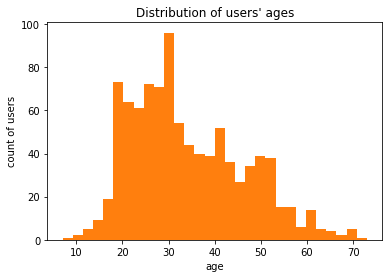

In [85]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

plt.show()

pandas' integration with [matplotlib](http://matplotlib.org/index.html) makes basic graphing of Series/DataFrames trivial.  In this case, just call `hist` on the column to produce a histogram.  We can also use [matplotlib.pyplot](http://matplotlib.org/users/pyplot_tutorial.html) to customize our graph a bit (always label your axes).

**Binning our users**

I don't think it'd be very useful to compare individual ages - let's bin our users into age groups using `pandas.cut`.

In [86]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


`pandas.cut` allows you to bin numeric data. In the above lines, we first created labels to name our bins, then split our users into eight bins of ten years (0-9, 10-19, 20-29, etc.). Our use of `right=False` told the function that we wanted the bins to be *exclusive* of the max age in the bin (e.g. a 30 year old user gets the 30s label).

Now we can now compare ratings across age groups.

In [87]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

Young users seem a bit more critical than other age groups. Let's look at how the 50 most rated movies are viewed across each age group. We can use the `most_50` Series we created earlier for filtering.

In [88]:
lens.set_index('movie_id', inplace=True)

In [89]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

Notice that both the title and age group are indexes here, with the average rating value being a Series. This is going to produce a really long list of values.

Wouldn't it be nice to see the data as a table? Each title as a row, each age group as a column, and the average rating in each cell.

Behold! The magic of `unstack`!

In [90]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


`unstack`, well, unstacks the specified level of a [MultiIndex](http://pandas.pydata.org/pandas-docs/stable/indexing.html#hierarchical-indexing-multiindex) (by default, `groupby` turns the grouped field into an index - since we grouped by two fields, it became a MultiIndex). We unstacked the second index (remember that Python uses 0-based indexes), and then filled in NULL values with 0.

If we would have used:
```python
    by_age.rating.mean().unstack(0).fillna(0)
```
We would have had our age groups as rows and movie titles as columns.

**Which movies do men and women most disagree on?**

EDIT: *I realized after writing this question that Wes McKinney basically went through the exact same question in his book. It's a good, yet simple example of pivot_table, so I'm going to leave it here. Seriously though, [go buy the book](http://www.amazon.com/gp/product/1449319793/ref=as_li_tl?ie=UTF8&camp=1789&creative=390957&creativeASIN=1449319793&linkCode=as2&tag=gjreda-20&linkId=MCGW4C4NOBRVV5OC).*

Think about how you'd have to do this in SQL for a second. You'd have to use a combination of IF/CASE statements with aggregate functions in order to pivot your dataset. Your query would look something like this:

    SELECT title, AVG(IF(sex = 'F', rating, NULL)), AVG(IF(sex = 'M', rating, NULL))
    FROM lens
    GROUP BY title;
    
Imagine how annoying it'd be if you had to do this on more than two columns.
    
DataFrame's have a *pivot_table* method that makes these kinds of operations much easier (and less verbose).

In [94]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [95]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [96]:
pivoted.reset_index('movie_id', inplace=True)

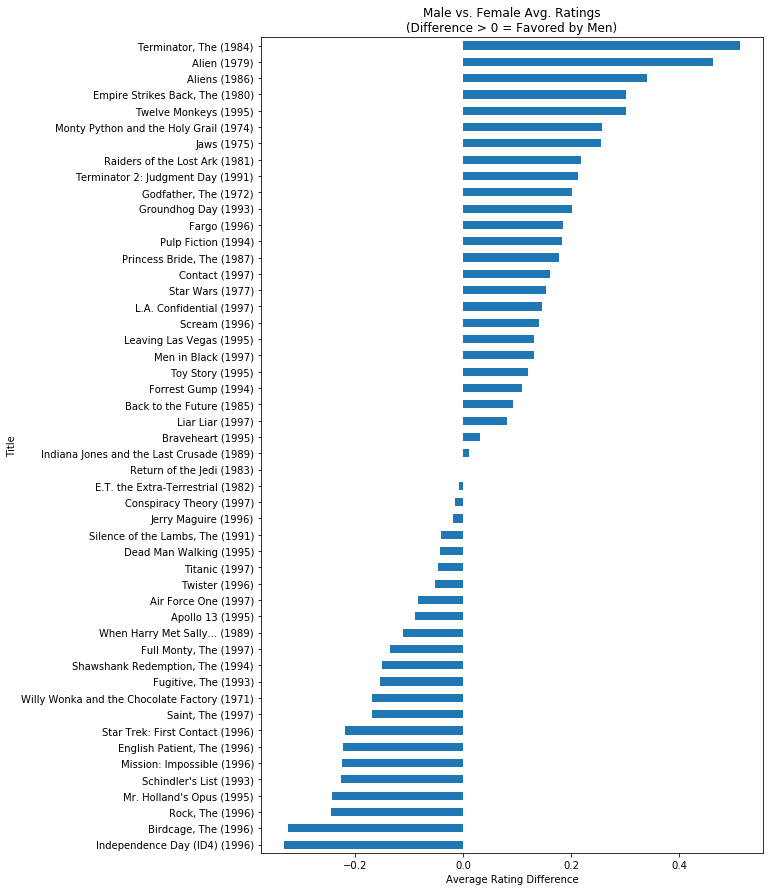

In [99]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

plt.show()

Of course men like Terminator more than women. Independence Day though? Really?

### Additional Resources:

* [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [Introduction to pandas](http://nbviewer.ipython.org/urls/gist.github.com/fonnesbeck/5850375/raw/c18cfcd9580d382cb6d14e4708aab33a0916ff3e/1.+Introduction+to+Pandas.ipynb) by [Chris Fonnesbeck](https://twitter.com/fonnesbeck)
* [pandas videos from PyCon](http://pyvideo.org/search?models=videos.video&q=pandas)
* [pandas and Python top 10](http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/)
* [pandasql](http://blog.yhathq.com/posts/pandasql-sql-for-pandas-dataframes.html)
* [Practical pandas by Tom Augspurger (one of the pandas developers)](http://tomaugspurger.github.io/categories/pandas.html)
    * [Video](https://www.youtube.com/watch?v=otCriSKVV_8) from Tom's pandas tutorial at PyData Seattle 2015